#### Sử dụng SOM để train trước khi áp dụng LVQ

In [1]:
import numpy as np
from sklearn.metrics import euclidean_distances
import pandas as pd

import sys
sys.path.insert(0, '../SOM-LVQ')
import SOM_LVQ
from minisom import MiniSom
from supervisedSom import supervisedSom

In [2]:
data = pd.read_csv(r"../data/AReM/Dataset1(combined).csv")
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
y[y==7] = 0
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

# use Minmaxscaler because we use euclidean distance
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

C:\Users\Thend\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# Training the SOM
from minisom import MiniSom
som1 = MiniSom(x = 25, y = 25, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som1.random_weights_init(x_train)
som1.train_random(data = x_train, num_iteration = 200)

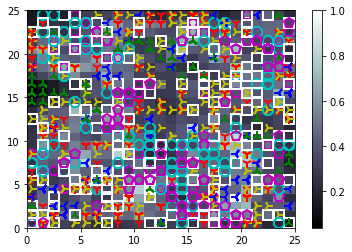

In [4]:
suso1 = supervisedSom(som1, x_train, y_train)

label1= suso1.visualSom()

In [5]:
taggings1 = suso1.taggingSom()

p_vectors = SOM_LVQ.init_LVQ_pvectors(som1, taggings1, x_train, y_train)

In [7]:
lvq1 = SOM_LVQ.SOM_LVQ(x_train, y_train, n_classes=7, n_neurons=0, p_vectors=p_vectors, epsilon=0.9, epsilon_dec_factor=0.001)
# neurons = lvq1.fit(x_train, y_train)
neurons = lvq1.train_LVQ_neighbors(x_train, y_train)
# neurons = lvq1.train_LVQ2(x_train, y_train)

In [8]:
predicted_y1 = [lvq1.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y1, target_names=['0', '1', '2', '3', '4', '5', '6']))

             precision    recall  f1-score   support

          0       0.67      0.61      0.63       119
          1       0.94      0.99      0.96       124
          2       0.97      0.94      0.95       129
          3       0.62      0.69      0.65       130
          4       1.00      0.98      0.99       124
          5       0.72      0.79      0.76       107
          6       0.84      0.72      0.77       107

avg / total       0.82      0.82      0.82       840

